In [40]:
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [41]:
# Loading the mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [42]:
type(X_train)

numpy.ndarray

In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


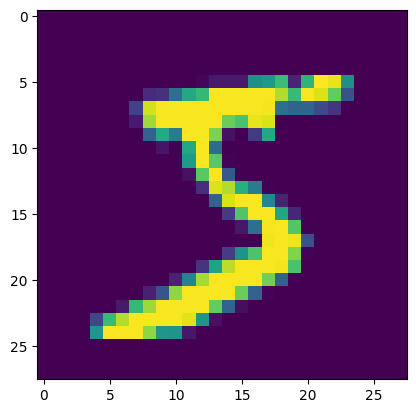

In [44]:
# printing the first image
plt.imshow(X_train[0])

In [45]:
#unique values in y_train
print(np.unique(y_train))
#unique values in y_test
print(np.unique(y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [46]:
# Scaling the values
X_train = X_train / 255
X_test = X_test / 255

# Building Neural Network

In [47]:
# Setting up layers of the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [48]:
# Compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
# Training the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8856 - loss: 0.3976
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9681 - loss: 0.1063
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9772 - loss: 0.0712
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9845 - loss: 0.0498
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9880 - loss: 0.0385
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9898 - loss: 0.0313
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9905 - loss: 0.0276
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9923 - loss: 0.0220
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9938 - loss: 0.0184
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9933 - loss: 0.0188


In [50]:
# Accuracy on test data
loss, accuracy=model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9738 - loss: 0.1098


In [51]:
print(X_test.shape)

(10000, 28, 28)


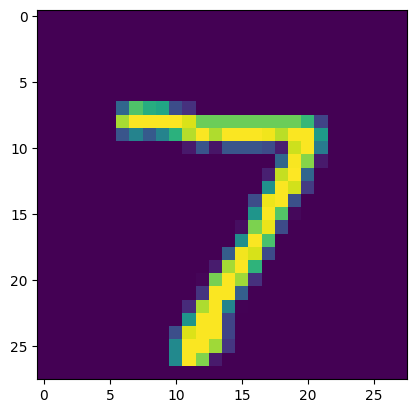

In [52]:
plt.imshow(X_test[0])

In [53]:
print(y_test[0])

7


In [54]:
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [55]:
print(y_pred.shape)

(10000, 10)


In [56]:
print(y_pred[0])

[2.6449504e-06 7.5664325e-04 9.4247134e-03 4.4978136e-01 5.5922508e-05
 5.3079126e-05 5.0422100e-10 9.9999976e-01 1.4391092e-02 7.9793471e-01]


In [57]:
# Converting the predictions to label
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [58]:
# Converting the predictions to label for test datapoints
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(8), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(8), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [59]:
# Confusion-Matrix
cm = confusion_matrix(y_test, y_pred_labels)
print(cm)

tf.Tensor(
[[ 972    0    2    1    0    0    1    0    3    1]
 [   0 1111    2    1    0    2    5    1   11    2]
 [   4    0 1015    0    1    0    1    5    6    0]
 [   0    0    7  975    0    9    0    5    6    8]
 [   0    0    6    0  936    4   10    4    6   16]
 [   2    0    0    4    0  881    2    0    2    1]
 [   5    2    1    1    3    5  940    0    1    0]
 [   0    0   11    0    0    0    0 1001    5   11]
 [   0    0    3    1    0    5    4    3  956    2]
 [   3    2    0    1    3    5    1    1    9  984]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

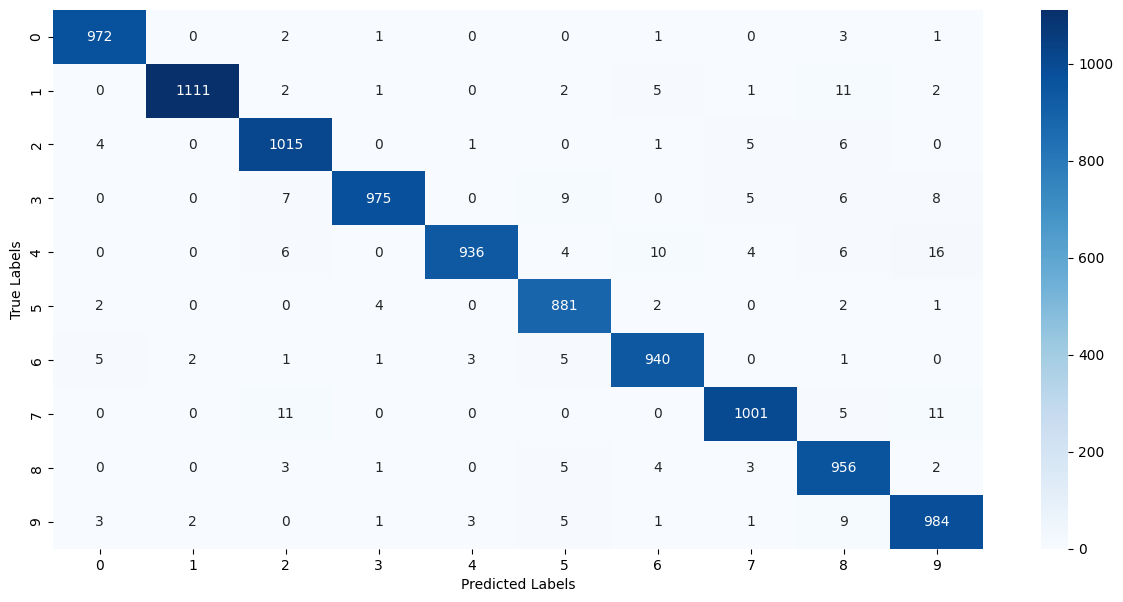

In [60]:
plt.figure(figsize = (15,7))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')


Enter the path of the image to be predicted: /content/Screenshot from 2025-07-25 16-23-43.png


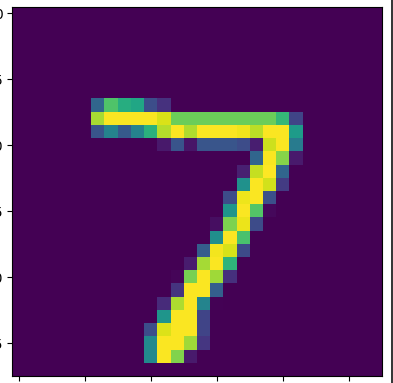

In [61]:
#  Building a predictive system
input_image_path=input("Enter the path of the image to be predicted: ")
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)


In [62]:
type(input_image)

numpy.ndarray

In [63]:
print(input_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [ 56  56  56]
  [ 56  56  56]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [ 56  56  56]
  [ 56  56  56]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [ 56  56  56]
  [ 56  56  56]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [ 56  56  56]
  [ 56  56  56]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [ 56  56  56]
  [ 56  56  56]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [ 56  56  56]
  [ 56  56  56]]]


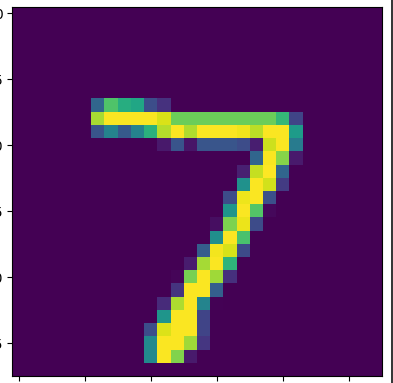

In [64]:
cv2_imshow(input_image)

In [65]:
input_image.shape

(383, 393, 3)

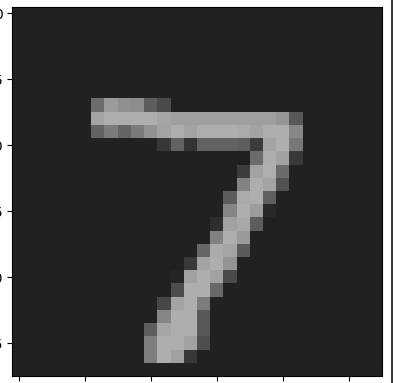

In [66]:
greyscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
cv2_imshow(greyscale)

In [67]:
greyscale.shape

(383, 393)

In [68]:
input_image_resize=cv2.resize(greyscale,(28,28))
cv2_imshow(input_image_resize)

In [69]:
input_image_resize.shape

(28, 28)

In [70]:
input_image_resize=input_image_resize/255

In [71]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [72]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[1.8760160e-04 2.9374918e-02 9.7059888e-01 4.9730667e-01 9.4091024e-07
  1.3707897e-06 3.2132427e-06 9.9992549e-01 3.7751928e-01 1.8984155e-04]]


In [73]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

7


Enter the path of the image to be predicted: /content/Screenshot from 2025-07-25 16-23-43.png


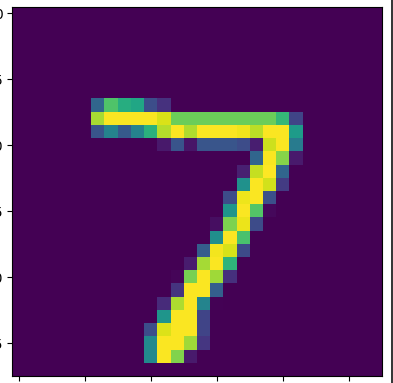

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The Handwritten Digit is recognised as  7


In [75]:
# Predictive system
input_image_path=input("Enter the path of the image to be predicted: ")

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

greyscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize=cv2.resize(greyscale,(28,28))

input_image_resize=input_image_resize/255

image_reshaped=np.reshape(input_image_resize,[1,28,28])

input_prediction=model.predict(image_reshaped)

input_pred_label=np.argmax(input_prediction)

print("The Handwritten Digit is recognised as ",input_pred_label)
